In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
startup = pd.read_csv('50_Startups.csv')

In [74]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [75]:
startup.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [76]:
startup.shape

(50, 5)

In [77]:
startup.size

250

In [78]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Data does not have any missing values

# 2. checking for duplicates

In [79]:
startup.duplicated().any()

False

# 3. Checking Outliers

In [80]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [81]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [82]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

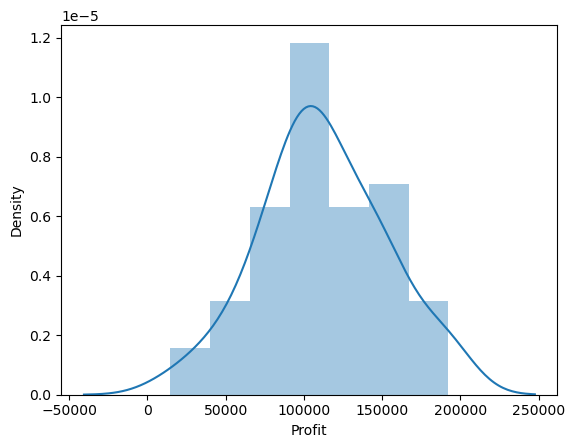

In [83]:
sns.distplot(startup['Profit'])

It is normally distributed

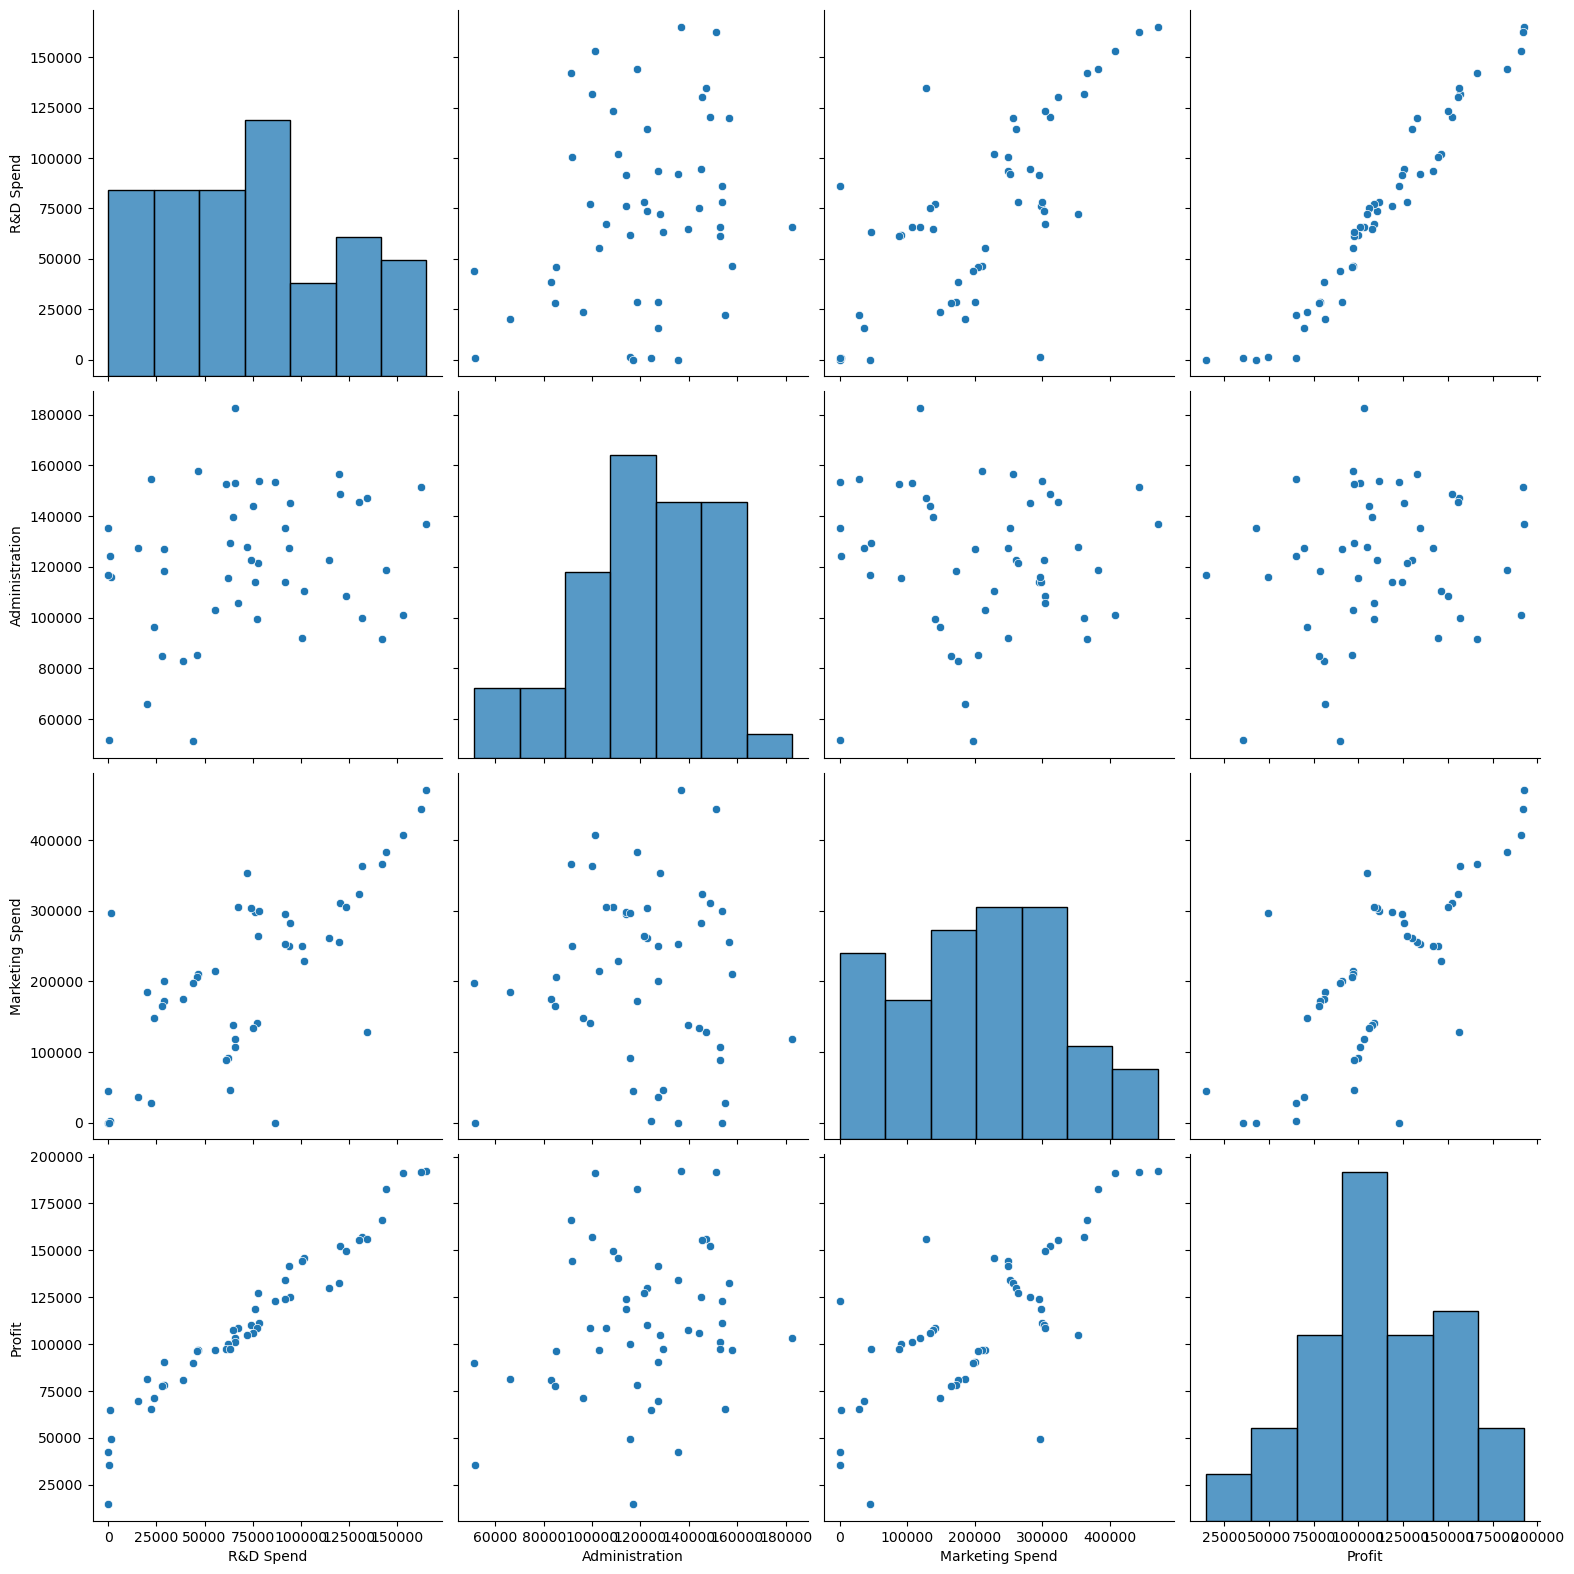

In [84]:
sns.pairplot(startup,height=4,aspect=1)

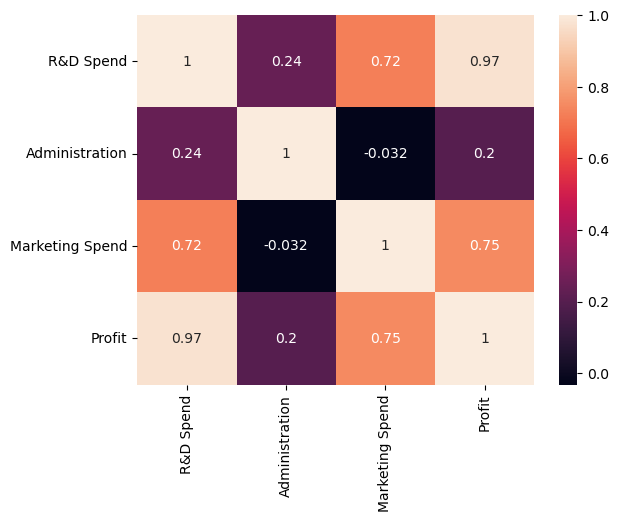

In [85]:
sns.heatmap(startup.corr(),annot = True);

conclusion: R&D Spend seems to be more correlated with profit as 0.97 is very near to 1

# Model Building

# Simple Linear Regression
Let X be R&D Spend an y means target column be Profit

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [87]:
#Step 1: select dependent and independent variables (ie. x and y)
#setting the value for x and y
x = startup[['R&D Spend']]
y = startup['Profit']

In [88]:
#Step 2: bifurcation of data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [89]:
# Step 3: Model Instantiation
slr=LinearRegression()

In [90]:
# Step 4: fit the model with train data
slr.fit(x_train,y_train)

LinearRegression()

In [91]:
# Printing the model coefficients
print('Intercept:',slr.intercept_)
print('Coefficient:',slr.coef_)

Intercept: 49336.66803799113
Coefficient: [0.85360911]


In [92]:
print('regression Equation: 50_startup = 49336.66 + 0.85 *R&DSpend')

regression Equation: 50_startup = 49336.66 + 0.85 *R&DSpend


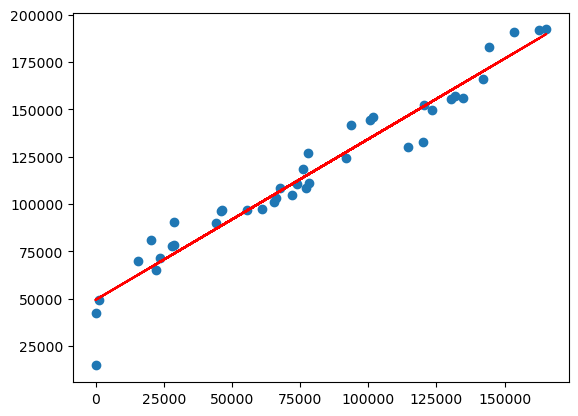

In [93]:
# line of best fit
plt.scatter(x_train,y_train)
plt.plot(x_train, 49336.66 + 0.85 * x_train,'r')
plt.show();

In [94]:
# prediction of testand training set result
y_pred_slr = slr.predict(x_test)

In [95]:
# actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff 

,Actual value,Predicted value
13,134307.35,127862.209964
39,81005.76,82250.563346
30,99937.59,102255.720782
45,64926.08,50190.473476
17,125370.37,130136.881905
48,35673.41,49799.366855
26,105733.54,113638.077529
25,107404.34,104535.053429
32,97427.84,103463.048431
19,122776.86,123105.311027


In [96]:
#Predict for any value
slr.predict([[109200]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([142550.78257862])

In [97]:
slr.predict(np.array([98000]).reshape(1,-1))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([132990.36057445])

In [98]:
from sklearn.metrics import r2_score
y_test_pred = slr.predict(x_test)

y_train_pred = slr.predict(x_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print('Training = {} testing = {}'.format(a,b))

Training = 0.9467864227524652 testing = 0.9265108109341951


Conclusion : 94.67% of the data fit the regression model

In [99]:
meanAbErr = metrics.mean_absolute_error(y_test,y_test_pred)
meanSqerr = metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSqErr = np.sqrt(meanSqerr)
print('Mean Absolute Error:',meanAbErr)
print('mean Squared Error:',meanSqerr)
print('Root Mean Squared Error:',rootMeanSqErr)

Mean Absolute Error: 6077.363300620399
mean Squared Error: 59510962.80787996
Root Mean Squared Error: 7714.334890830185


# multiple Linear Regression

In [100]:
# setting the x and y value
x = startup[['R&D Spend', 'Marketing Spend']]
y = startup['Profit']

## Standardization

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
x_scaled = scaler.fit_transform(x)

In [102]:
#Step 2: bifurcation of data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.8,random_state=42)

In [103]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [104]:
# Printing the model coefficients
print('Intercept:',mlr.intercept_)
print('Coefficient:',mlr.coef_)

Intercept: 111574.59251080672
Coefficient: [35597.24609681  4750.41694319]


In [105]:
y_pred_mlr = mlr.predict(x_test)

In [106]:
y_pred_mlr

array([127521.38604123,  82615.07411457,  97683.2462344 ,  46400.65677644,
       130782.53611917,  45967.0205249 , 109813.19061887, 101612.68921418,
        97023.64013854, 113241.36575804])

In [107]:
from sklearn.metrics import r2_score
y_test_pred = mlr.predict(x_test)

y_train_pred = mlr.predict(x_train)
a = r2_score(y_train,y_train_pred)*100
b = r2_score(y_test,y_test_pred)*100
print('Training = {:.2f}% testing = {:.2f}%'.format(a,b))

Training = 95.19% testing = 91.68%


### Multiple Regression has given R2_score = 95.19% for trining & R2_score  = 91.68% for testing so We can say this is a generalized model